In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pysam
print("imports finished")

imports finished


In [5]:
gt_df_unfiltered = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP048801/GT_per_sample_unfiltered.tsv", sep="\s+", header=None)

In [4]:
pre_imputation_vcf = pd.read_table('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/GT_per_sample_pre.tsv', sep="\s+", header=None)
post_imputation_vcf = pd.read_table('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/GT_per_sample_post.tsv', sep="\s+", header=None)

In [16]:
root_dir = "/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq"

gt_dfs = {}
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file == "GT_per_sample.tsv":
            file_path = os.path.join(root, file)
            folder_name = os.path.basename(root)
            gt_df = pd.read_table(file_path, sep="\s+", header=None)
            gt_dfs[folder_name] = gt_df

In [6]:
def categorize_genotype(gt):
    if gt in ['0/0', '0|0']:
        return '0/0'
    elif gt in ['0/1', '1/0', '0|1', '1|0']:
        return '0/1 or 1/0'
    elif gt == '1/1':
        return '1/1'
    else:
        return 'Missing'

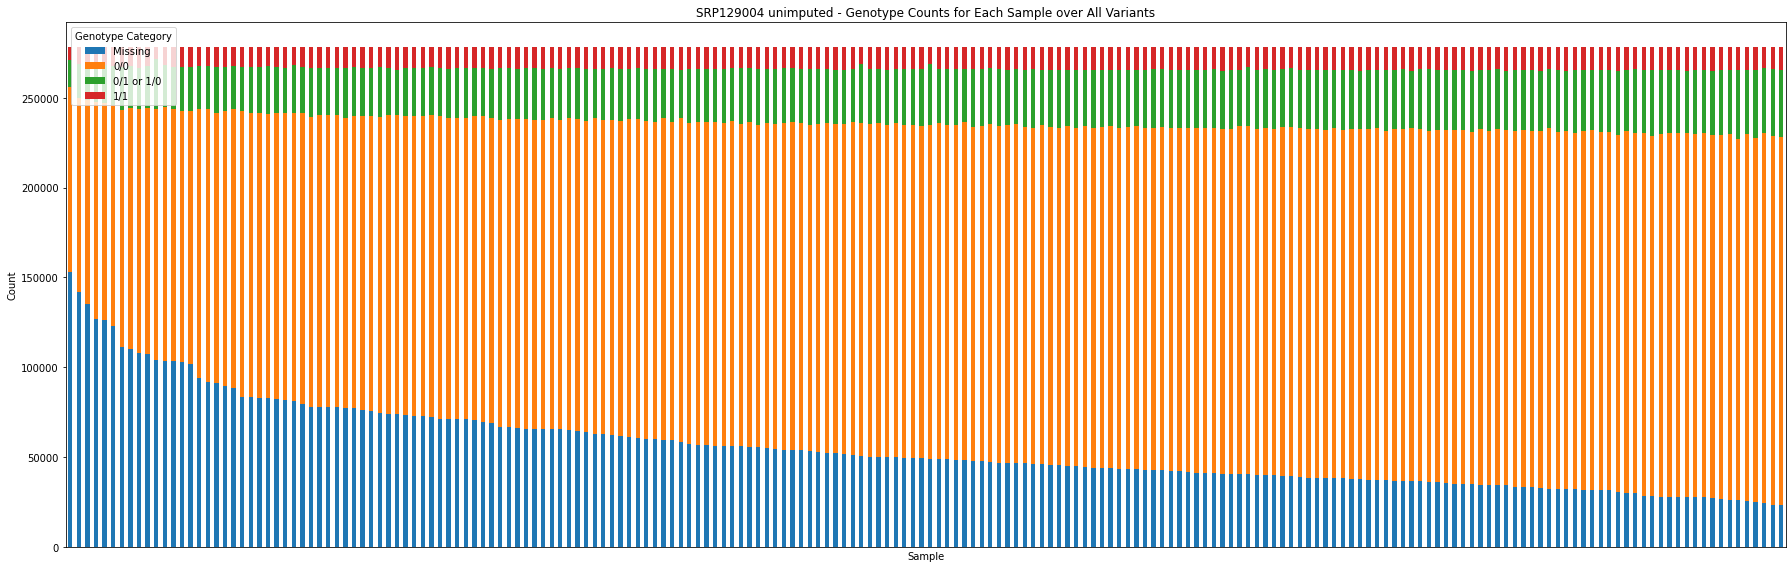

In [17]:
# Apply the categorize_genotype function element-wise to each column
df_categorized = pre_imputation_vcf.map(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Calculate total count of missing values for each sample
missing_counts = counts_per_sample.loc['Missing']

# Sort samples based on total count of missing values
sorted_samples = missing_counts.sort_values(ascending=False).index

# Reorder columns in the DataFrame with missing value category at the bottom
counts_per_sample = counts_per_sample[sorted_samples.tolist()]

# Define the order of genotype categories for stacking
genotype_order = ['Missing', '0/0', '0/1 or 1/0', '1/1']

counts_per_sample.T[genotype_order].plot(kind='bar', stacked=True, figsize=(25, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('SRP129004 unimputed - Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category', loc='upper left')
plt.xticks([])
plt.tight_layout()
plt.show()

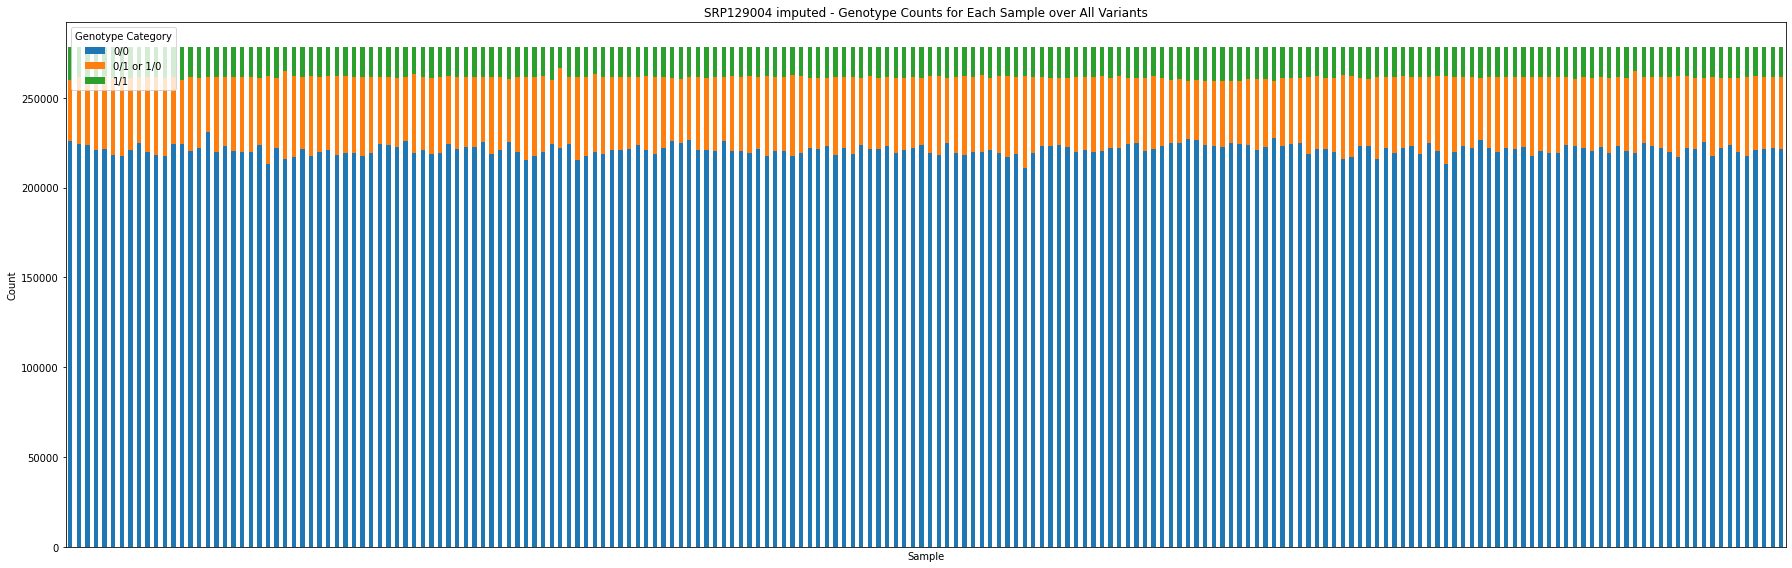

In [18]:
# Apply the categorize_genotype function element-wise to each column
df_categorized = post_imputation_vcf.map(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Calculate total count of missing values for each sample
missing_counts = counts_per_sample.loc['Missing'] if 'Missing' in counts_per_sample.index else pd.Series(0, index=counts_per_sample.columns)

# Sort samples based on total count of missing values
sorted_samples = missing_counts.sort_values(ascending=False).index

# Reorder columns in the DataFrame with missing value category at the bottom
counts_per_sample = counts_per_sample[sorted_samples.tolist()]

# Define the order of genotype categories for stacking
genotype_order = ['Missing', '0/0', '0/1 or 1/0', '1/1']

# Check if 'Missing' category exists, if not, remove it from genotype_order
if 'Missing' not in counts_per_sample.index:
    genotype_order.remove('Missing')

counts_per_sample.T[genotype_order].plot(kind='bar', stacked=True, figsize=(25, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('SRP129004 imputed - Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category', loc='upper left')
plt.xticks([])
plt.tight_layout()
plt.show()

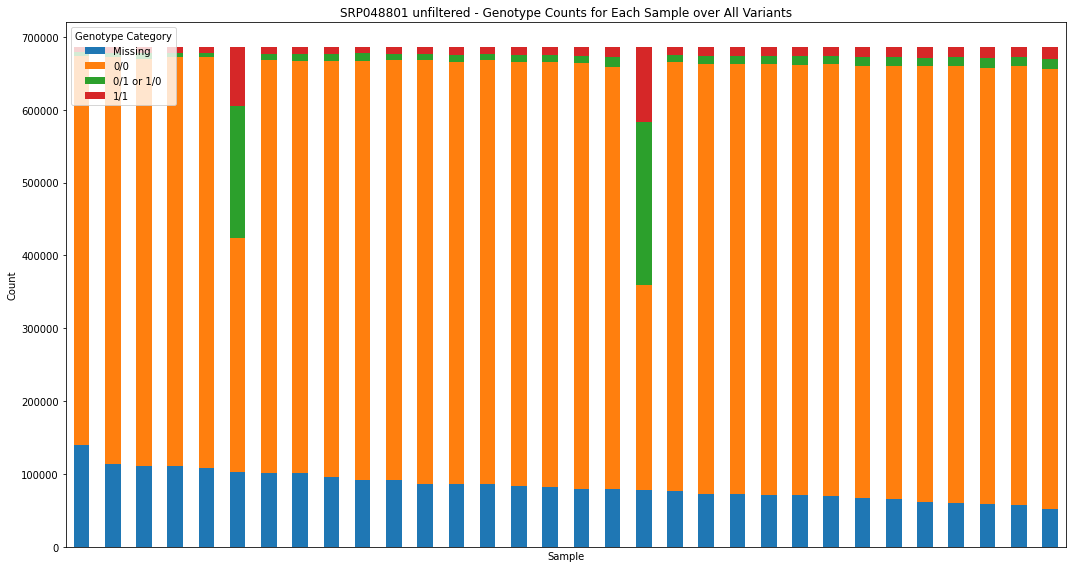

In [15]:
# Apply the categorize_genotype function element-wise to each column
df_categorized = gt_df_unfiltered.map(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Calculate total count of missing values for each sample
missing_counts = counts_per_sample.loc['Missing']

# Sort samples based on total count of missing values
sorted_samples = missing_counts.sort_values(ascending=False).index

# Reorder columns in the DataFrame with missing value category at the bottom
counts_per_sample = counts_per_sample[sorted_samples.tolist()]

# Define the order of genotype categories for stacking
genotype_order = ['Missing', '0/0', '0/1 or 1/0', '1/1']

counts_per_sample.T[genotype_order].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('SRP048801 unfiltered - Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category', loc='upper left')
plt.xticks([])
plt.tight_layout()
plt.show()

/tmp/ipykernel_664643/2039207487.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = df.applymap(categorize_genotype)


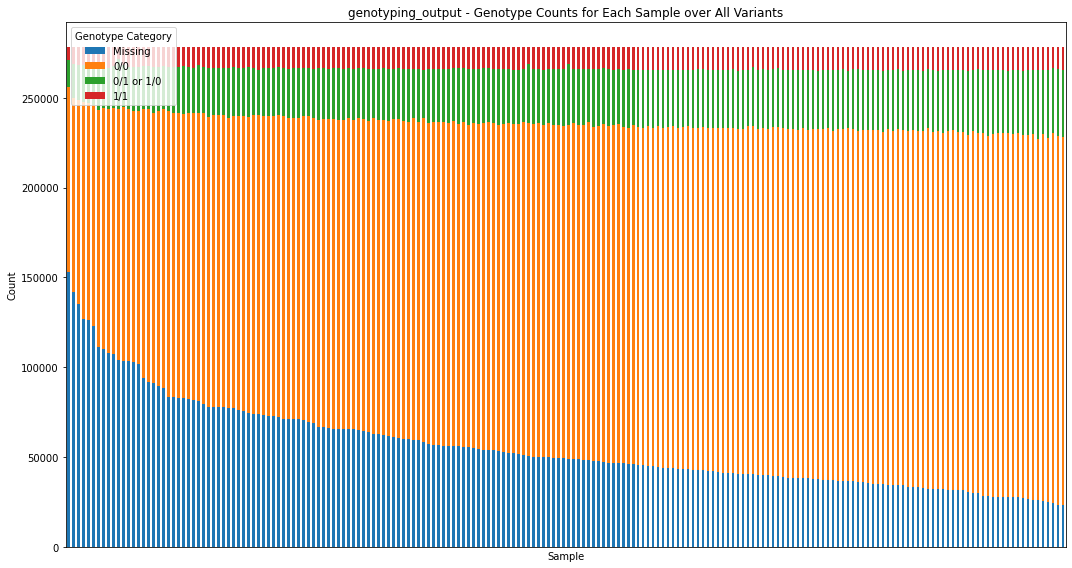

/tmp/ipykernel_664643/2039207487.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = df.applymap(categorize_genotype)


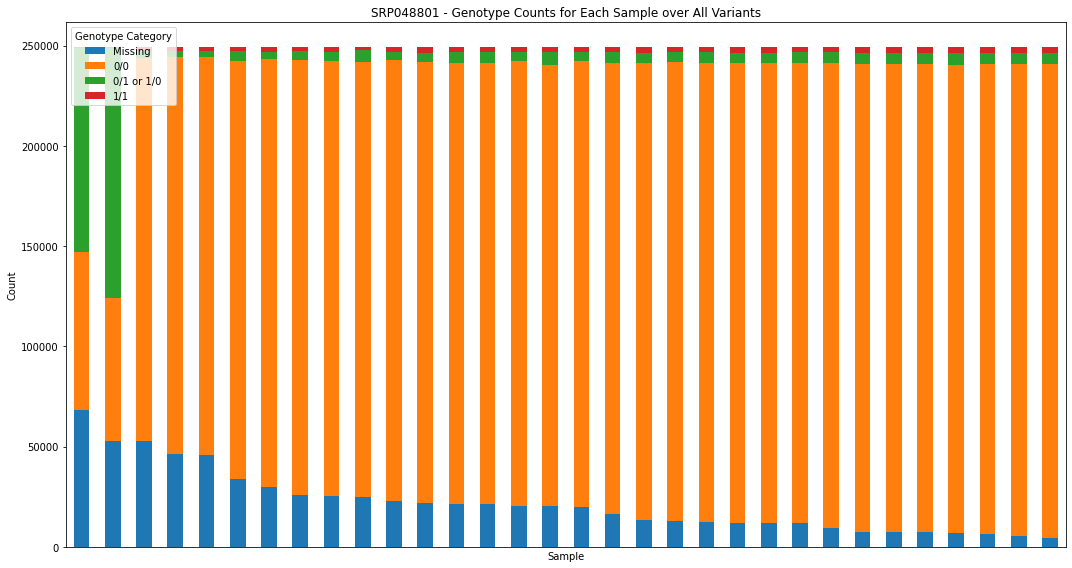

/tmp/ipykernel_664643/2039207487.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = df.applymap(categorize_genotype)


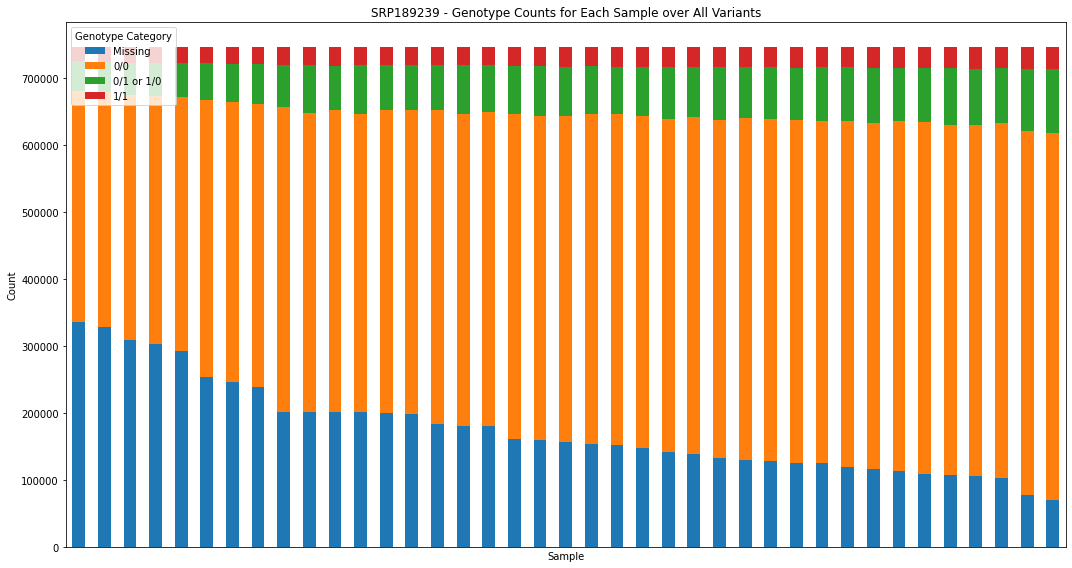

/tmp/ipykernel_664643/2039207487.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = df.applymap(categorize_genotype)


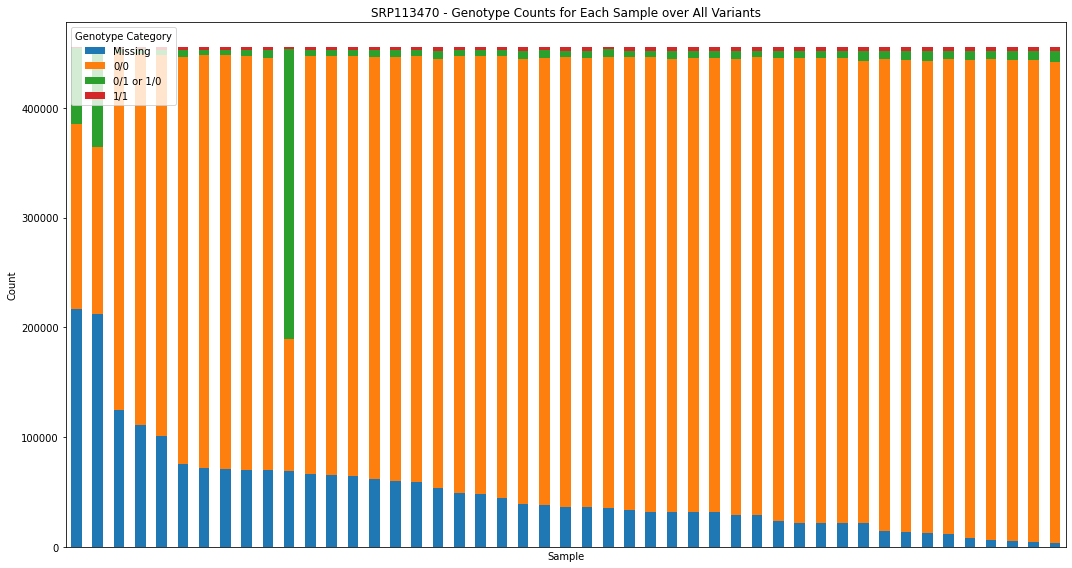

In [17]:
for i, (folder_name, df) in enumerate(gt_dfs.items()):
    # Apply the categorize_genotype function element-wise to each column
    df_categorized = df.applymap(categorize_genotype)

    # Count occurrences of each category for each sample
    counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

    # Calculate total count of missing values for each sample
    missing_counts = counts_per_sample.loc['Missing']

    # Sort samples based on total count of missing values
    sorted_samples = missing_counts.sort_values(ascending=False).index

    # Reorder columns in the DataFrame with missing value category at the bottom
    counts_per_sample = counts_per_sample[sorted_samples.tolist()]

    # Define the order of genotype categories for stacking
    genotype_order = ['Missing', '0/0', '0/1 or 1/0', '1/1']

    counts_per_sample.T[genotype_order].plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.xlabel('Sample')
    plt.ylabel('Count')
    plot_title = folder_name + ' - Genotype Counts for Each Sample over All Variants'
    plt.title(plot_title)
    plt.legend(title='Genotype Category', loc='upper left')
    plt.xticks([])
    plt.tight_layout()
    plt.show()